In [1]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Replace the following with your database configuration
db_config = {
   "dbname": "postgres",
    "user": "postgres",
    "password": "finalproject",
    "host": "database-1.cxqtmtcu0z5m.us-east-1.rds.amazonaws.com",
    "port": "5432"  # Default is 5432 for PostgreSQL
}

#Connect to the PostgreSQL database

engine = create_engine(f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

#Load data from the ev_registration_giga table into a pandas DataFrame
query = "SELECT * FROM ev_registration_gigas;"
df1 = pd.read_sql_query(query, engine)

In [3]:
#df1 = pd.read_csv("C:\\Users\\LSchu\\Documents\\Class\\Final Project\\Final Project\\EV_Data.csv")

In [4]:
print(df1.head())
print(df1.columns)

  state  year  electric_ev  plug_in_hybrid_electric_phev  \
0    ID  2021       3500.0                        2500.0   
1    IL  2021      36500.0                       18300.0   
2    IN  2021      10400.0                        7500.0   
3    IA  2021       3700.0                        3600.0   
4    KS  2021       4500.0                        3300.0   

   charging_station_count  income  education  population  non_ev_total  \
0                   282.0   76918      0.307     1904314       1875700   
1                  1792.0   79253      0.371    12686469       9913300   
2                   606.0   70190      0.289     6813532       6018200   
3                   492.0   72429      0.305     3197689       3043800   
4                   910.0   75979      0.354     2937922       2565100   

   ev_total  
0      6000  
1     54800  
2     17900  
3      7300  
4      7800  
Index(['state', 'year', 'electric_ev', 'plug_in_hybrid_electric_phev',
       'charging_station_count', 'incom

In [5]:
df = df1.drop(['state', 'electric_ev', 'plug_in_hybrid_electric_phev', 'charging_station_count'], axis= 1)
print(df)

     year  income  education  population  non_ev_total  ev_total
0    2021   76918      0.307     1904314       1875700      6000
1    2021   79253      0.371    12686469       9913300     54800
2    2021   70190      0.289     6813532       6018200     17900
3    2021   72429      0.305     3197689       3043800      7300
4    2021   75979      0.354     2937922       2565100      7800
..    ...     ...        ...         ...           ...       ...
301  2016   80268      0.381     8410106       7331000      7300
302  2016   87648      0.351     7294771       6073200     21300
303  2016   46836      0.208     1831023       1502400       400
304  2016   69943      0.295     5772628       5310200      5200
305  2016   71052      0.271      584215        591200       200

[306 rows x 6 columns]


In [6]:
X = df.drop('ev_total',axis= 1)
y = df['ev_total']
print(X)
print(y)

     year  income  education  population  non_ev_total
0    2021   76918      0.307     1904314       1875700
1    2021   79253      0.371    12686469       9913300
2    2021   70190      0.289     6813532       6018200
3    2021   72429      0.305     3197689       3043800
4    2021   75979      0.354     2937922       2565100
..    ...     ...        ...         ...           ...
301  2016   80268      0.381     8410106       7331000
302  2016   87648      0.351     7294771       6073200
303  2016   46836      0.208     1831023       1502400
304  2016   69943      0.295     5772628       5310200
305  2016   71052      0.271      584215        591200

[306 rows x 5 columns]
0       6000
1      54800
2      17900
3       7300
4       7800
       ...  
301     7300
302    21300
303      400
304     5200
305      200
Name: ev_total, Length: 306, dtype: int64


In [7]:
# creating train and test sets
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, shuffle = True)

train_index = X.year==2021
X_train = X.loc[~train_index]
X_test = X.loc[train_index]
y_train = y.loc[~train_index]
y_test = y.loc[train_index]

In [8]:
# creating a regression model
model = LinearRegression()

In [9]:
# fitting the model
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5894207936808619
Testing Score: 0.5775005368657995


In [10]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f'Min X Value: {x_min}')
print(f'Max X Value: {x_max}')

Min X Value: [[[2.0160e+03 4.6159e+04 2.0200e-01 0.0000e+00 3.1070e+05]]]
Max X Value: [[[2.0210000e+03 1.0128300e+05 6.3600000e-01 3.9512223e+07 3.4111700e+07]]]


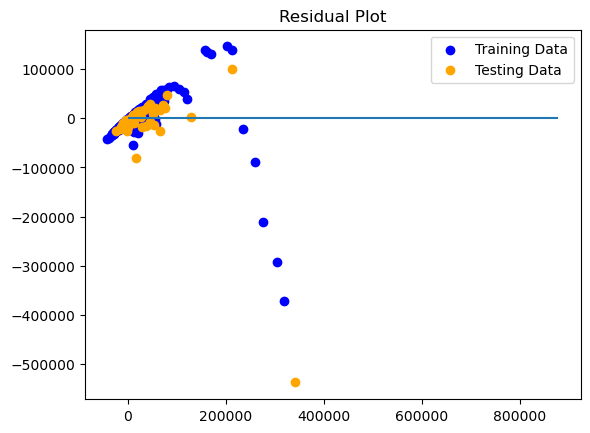

In [11]:
#plot residuals

plt.scatter(model.predict(X_train), model.predict(X_train)-y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [12]:
# making predictions
predictions = model.predict(X_test)
print(predictions)

[ 11563.37819578  75561.68642491  46040.81138268  19415.6842378
  12532.5138955   10330.10052785   6591.37764432  -6523.54447539
  50992.17174987  36745.44752767  55402.52957771  44324.03958733
  -9837.92323202  32893.20933484 -15028.2920024   10788.23810725
  -1374.13931758  13252.34887172  53187.3509943  -15483.36287126
  16057.6808833   57403.01307786 -10470.82154165  80503.23609135
  22324.7743608   29147.89451528  72394.21186124  -7624.36545235
  26836.50330532  -3222.53662364  38655.5339746  212364.79946818
  27118.30116963 -11832.37771953  64619.53241658  65638.28711308
 -25024.4657231   41874.52080989  -9373.38719789  22250.8185567
  -4800.30501772  -2337.4781459   44824.26694562  -7550.06988363
 341410.33756302  45776.32341969  12796.39154092 -12125.95993365
 129776.1897537   64577.8963501    1012.87293723]


In [13]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  6252853592.8166275
mean_absolute_error :  27925.482282963163


In [15]:
print(model.intercept_)

-7846442.181098354


In [16]:
print(model.coef_)

[ 3.84455988e+03  1.05947124e+00 -5.01074656e+04 -1.13333596e-02
  2.32568629e-02]


In [17]:
print(model.score(X,y))

0.589722359833712


In [35]:
df2 = df1.drop(['electric_ev', 'plug_in_hybrid_electric_phev',
       'charging_station_count'], axis=1)

In [36]:
print(df2)

    state  year  income  education  population  non_ev_total  ev_total
0      ID  2021   76918      0.307     1904314       1875700      6000
1      IL  2021   79253      0.371    12686469       9913300     54800
2      IN  2021   70190      0.289     6813532       6018200     17900
3      IA  2021   72429      0.305     3197689       3043800      7300
4      KS  2021   75979      0.354     2937922       2565100      7800
..    ...   ...     ...        ...         ...           ...       ...
301    VA  2016   80268      0.381     8410106       7331000      7300
302    WA  2016   87648      0.351     7294771       6073200     21300
303    WV  2016   46836      0.208     1831023       1502400       400
304    WI  2016   69943      0.295     5772628       5310200      5200
305    WY  2016   71052      0.271      584215        591200       200

[306 rows x 7 columns]


In [37]:
df2_filtered = df2.loc[df2['year'] == 2021]

In [38]:
print(df2_filtered)

                    state  year  income  education  population  non_ev_total  \
0                      ID  2021   76918      0.307     1904314       1875700   
1                      IL  2021   79253      0.371    12686469       9913300   
2                      IN  2021   70190      0.289     6813532       6018200   
3                      IA  2021   72429      0.305     3197689       3043800   
4                      KS  2021   75979      0.354     2937922       2565100   
5                      KY  2021   55629      0.270     4506589       3980900   
6                      LA  2021   57206      0.264     4627098       3794100   
7                      ME  2021   71139      0.360     1377238       1218600   
8                      MD  2021   97332      0.425     6174610       4976300   
9                      MA  2021   86566      0.466     6989690       5339700   
10                     MI  2021   64488      0.317    10037504       8311900   
11                     MN  2021   80441 

In [ ]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)


In [39]:
x_new = np.arange(10).reshape((-1, 2))
x_new

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [44]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -7846442.181098354
Coefficients:


[('year', 3844.559881461876),
 ('income', 1.0594712361829406),
 ('education', -50107.46557777868),
 ('population', -0.011333359628165666),
 ('non_ev_total', 0.023256862853493293)]

In [65]:
total = -7846442.181098354 + (3844.559881461876*(df2_filtered.year)) + (1.0594712361829406*(df2_filtered.income)) + (-50107.46557777868*(df2_filtered.education)) + (-0.011333359628165666*(df2_filtered.population)) + (0.023256862853493293*(df2_filtered.non_ev_total))

In [52]:
print(total)

0       11563.378196
1       75561.686425
2       46040.811383
3       19415.684238
4       12532.513896
5       10330.100528
6        6591.377644
7       -6523.544475
8       50992.171750
9       36745.447528
10      55402.529578
11      44324.039587
12      -9837.923232
13      32893.209335
14     -15028.292002
15      10788.238107
16      -1374.139318
17      13252.348872
18      53187.350994
19     -15483.362871
20      16057.680883
21      57403.013078
22     -10470.821542
23      80503.236091
24      22324.774361
25      29147.894515
26      72394.211861
27      -7624.365452
28      26836.503305
29      -3222.536624
30      38655.533975
31     212364.799468
32      27118.301170
33     -11832.377720
34      64619.532417
35      65638.287113
36     -25024.465723
37      41874.520810
38      -9373.387198
260     22250.818557
261     -4800.305018
262     -2337.478146
263     44824.266946
264     -7550.069884
265    341410.337563
266     45776.323420
267     12796.391541
268    -12125

In [58]:
df3 = df2_filtered

In [66]:
total_df = pd.DataFrame(total)

In [67]:
print(total_df)

                 0
0     11563.378196
1     75561.686425
2     46040.811383
3     19415.684238
4     12532.513896
5     10330.100528
6      6591.377644
7     -6523.544475
8     50992.171750
9     36745.447528
10    55402.529578
11    44324.039587
12    -9837.923232
13    32893.209335
14   -15028.292002
15    10788.238107
16    -1374.139318
17    13252.348872
18    53187.350994
19   -15483.362871
20    16057.680883
21    57403.013078
22   -10470.821542
23    80503.236091
24    22324.774361
25    29147.894515
26    72394.211861
27    -7624.365452
28    26836.503305
29    -3222.536624
30    38655.533975
31   212364.799468
32    27118.301170
33   -11832.377720
34    64619.532417
35    65638.287113
36   -25024.465723
37    41874.520810
38    -9373.387198
260   22250.818557
261   -4800.305018
262   -2337.478146
263   44824.266946
264   -7550.069884
265  341410.337563
266   45776.323420
267   12796.391541
268  -12125.959934
269  129776.189754
270   64577.896350
271    1012.872937


In [68]:
df3 = pd.concat([df2_filtered, total_df], axis=1)

In [69]:
print(df3)

                    state  year  income  education  population  non_ev_total  \
0                      ID  2021   76918      0.307     1904314       1875700   
1                      IL  2021   79253      0.371    12686469       9913300   
2                      IN  2021   70190      0.289     6813532       6018200   
3                      IA  2021   72429      0.305     3197689       3043800   
4                      KS  2021   75979      0.354     2937922       2565100   
5                      KY  2021   55629      0.270     4506589       3980900   
6                      LA  2021   57206      0.264     4627098       3794100   
7                      ME  2021   71139      0.360     1377238       1218600   
8                      MD  2021   97332      0.425     6174610       4976300   
9                      MA  2021   86566      0.466     6989690       5339700   
10                     MI  2021   64488      0.317    10037504       8311900   
11                     MN  2021   80441 

In [ ]:
import pandas as pd

pre = [11563.37819578, 75561.68642491, 46040.81138268, 19415.6842378, 
  12532.5138955, 10330.10052785, 6591.37764432, -6523.54447539, 
  50992.17174987, 36745.44752767, 55402.52957771, 44324.03958733, 
  -9837.92323202, 32893.20933484, -15028.2920024, 10788.23810725, 
  -1374.13931758, 13252.34887172, 53187.3509943, -15483.36287126,
  16057.6808833,   57403.01307786, -10470.82154165,  80503.23609135,
  22324.7743608,   29147.89451528,  72394.21186124,  -7624.36545235,
  26836.50330532,  -3222.53662364,  38655.5339746,  212364.79946818,
  27118.30116963, -11832.37771953,  64619.53241658,  65638.28711308,
  -25024.4657231,   41874.52080989,  -9373.38719789,  22250.8185567,
  -4800.30501772,  -2337.4781459,   44824.26694562,  -7550.06988363,
  341410.33756302,  45776.32341969,  12796.39154092, -12125.95993365,
  129776.1897537,   64577.8963501,    1012.87293723]

dict = {'Predictions': pre}

df2 = pd.DataFrame(dict)
df2.to_csv('Predictions.csv')

In [70]:
total2 = -7846442.181098354 + (3844.559881461876*(df2_filtered.year)) + (1.0594712361829406*(df2_filtered.income)) + (0.023256862853493293*(df2_filtered.non_ev_total))

In [71]:
total2_df = pd.DataFrame(total2)

In [73]:
df3 = pd.concat([df2_filtered, total_df, total2_df], axis=1)
df3

,state,year,income,education,population,non_ev_total,ev_total,total,0,0
0,ID,2021,76918,0.307,1904314,1875700,6000,11563.378196,11563.378196,48528.645535
1,IL,2021,79253,0.371,12686469,9913300,54800,75561.686425,75561.686425,237931.871743
2,IN,2021,70190,0.289,6813532,6018200,17900,46040.811383,46040.811383,137742.077429
3,IA,2021,72429,0.305,3197689,3043800,7300,19415.684238,19415.684238,70939.020655
4,KS,2021,75979,0.354,2937922,2565100,7800,12532.513896,12532.513896,63567.083296
5,KY,2021,55629,0.270,4506589,3980900,7300,10330.100528,10330.100528,74933.910067
6,LA,2021,57206,0.264,4627098,3794100,5200,6591.377644,6591.377644,72260.314226
7,ME,2021,71139,0.360,1377238,1218600,7200,-6523.544475,-6523.544475,27123.876680
8,MD,2021,97332,0.425,6174610,4976300,42800,50992.171750,50992.171750,142266.920314
9,MA,2021,86566,0.466,6989690,5339700,52700,36745.447528,36745.447528,139312.196946


In [74]:
df3.to_csv("2021_predictions.csv")